In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from te_pai import Hamiltonian, resample, TE_PAI, Trotter


The number of qubit:14
Number of terms in the Hamiltonian:56


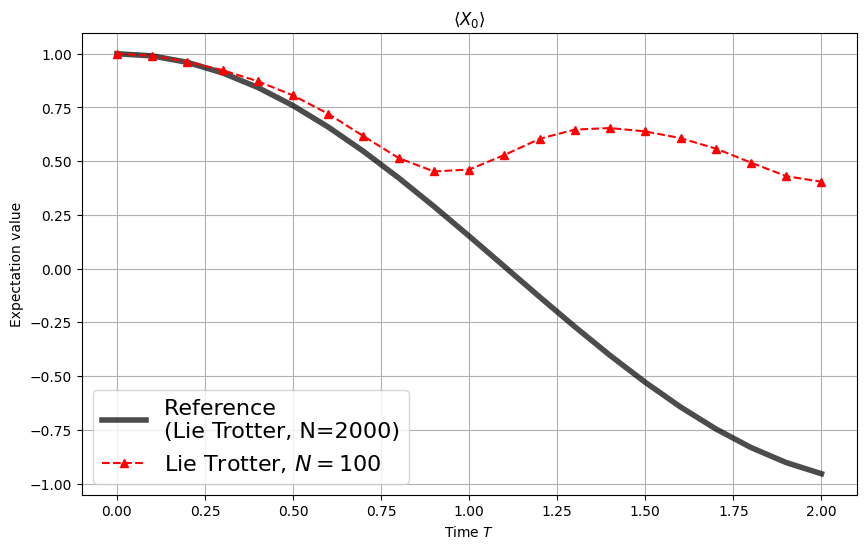

In [ ]:
numQs = 14
T = 2
n_snaps = 20
freqs = np.loadtxt("hamil_coef.csv", delimiter=",")
hamil = Hamiltonian.spin_chain_hamil(numQs, freqs, 99)
res1 = Trotter(hamil, numQs, T, 100, n_snaps).run()
res2 = Trotter(hamil, numQs, T, 2000, n_snaps).run()
res1 = [2 * x -1 for x in res1]
res2 = [2 * x - 1 for x in res2]
x = np.linspace(0, T, n_snaps + 1)
plt.figure(figsize=(10, 6))
_, caps, bars = plt.errorbar(
    x,
    res1,
    fmt="r--^",
    label="Lie Trotter, $N=100$",
    capsize=5,
)

plt.plot(
    x, res2, "k-", alpha=0.7, label="Reference \n(Lie Trotter, N=2000)", linewidth=4
)

[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]
plt.title("$\\langle X_0 \\rangle$")
plt.xlabel("Time $T$")
plt.ylabel("Expectation value")
plt.legend(fontsize=16)
plt.grid(True)
